In [1]:
"""
The purpose of this notebook is to plot root tree variables with uproot and matplotlib.
"""

'\nThe purpose of this notebook is to plot root tree variables with uproot and matplotlib \n'

In [41]:
%matplotlib inline
import uproot 
import os 
import numpy as np
from matplotlib import pyplot as plt 
from ROOT import TLorentzVector

Welcome to JupyROOT 6.24/00


In [7]:
file_path = "/eos/user/a/atishelm/ntuples/Delphes/VBFHHTo2G2Qlnu_CV_1_C2V_1_C3_0_TuneCP5_14TeV-madgraph-pythia8_ntuple_0_0.root"
tree_path = "myana/mytree"

In [44]:
##-- Bimodal statistical uncertainty 
def bimod_unc(a, b):
    ratio = a / b
    uncertainty = ratio * np.sqrt((1/a) + (1/b))
    return uncertainty


# def Add_CMS_Header(plt, lumi, isWide, ax):
def Add_CMS_Header(plt, isWide, ax):
    ##-- Upper left plot text
    ##-- CMS 
    plt.text(
        # 0.05, 0.9, u"CMS $\it{Preliminary}$",
        0., 1., u"CMS ",
        fontsize=20, fontweight='bold',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
    )
    
    if(isWide):
        prelim_x = 0.08
    else:
        prelim_x = 0.08
#         prelim_x = 0.12
    
    ##-- Preliminary 
    plt.text(
        prelim_x, 0.998, u"$\it{Simulation}$ $\it{Preliminary}$",
        fontsize=18,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
    )    

    ##-- Lumi 
    plt.text(
#         1., 1., r"%s fb$^{-1}$ (13 TeV)"%(lumi),
#         1., 1., "(13 TeV)",
        1., 1., "(14 TeV)",
        fontsize=16, horizontalalignment='right', 
        verticalalignment='bottom', 
        transform=ax.transAxes
    )  
    
    
def DeltaR(eta_0_, eta_1_, phi_0_, phi_1_):
    dEta = np.subtract(eta_0_, eta_1_)
    dPhi = np.subtract(phi_0_, phi_1_)
    dEta_squared = np.square(dEta)
    dPhi_squared = np.square(dPhi)
    dR = np.sqrt(np.add(dEta_squared, dPhi_squared))      
    return dR

def InvMass(pt_0_, eta_0_, phi_0_, mass_0_, pt_1_, eta_1_, phi_1_, mass_1_):
    v1 = TLorentzVector() 
    v1.SetPtEtaPhiM(pt_0_, eta_0_, phi_0_, mass_0_) 
    
    v2 = TLorentzVector()
    v2.SetPtEtaPhiM(pt_1_, eta_1_, phi_1_, mass_1_)
    
    TwoBodyVector = v1 + v2 
    TwoBodyMass = TwoBodyVector.M()
    
    return TwoBodyMass

In [57]:
BinDict = {
    "N_goodElectrons" : [0, 5, 5], 
    "N_goodMuons" : [0, 5, 5], 
    "N_allElectrons" : [0, 5, 5], 
    "N_allMuons" : [0, 5, 5],  
    "N_allLeptons" : [0, 10, 10],
    "N_goodLeptons" : [0, 3, 3],
    "N_allJets" : [0, 20, 20],
    "N_goodJets" : [0, 10, 10],
    "GEN_Lepton_0_pt" : [0, 400, 40],
    "GEN_Quark_0_pt" : [0, 400, 40],
    "GEN_Quark_1_pt" : [0, 400, 40],
    "GEN_Lepton_0_eta" : [-3, 3, 40],
    "GEN_Quark_0_eta" : [-3, 3, 40],
    "GEN_Quark_1_eta" : [-3, 3, 40],
    "GEN_Lepton_0_phi" : [-3, 3, 40],
    "GEN_Quark_0_phi" : [-3, 3, 40],
    "GEN_Quark_1_phi" : [-3, 3, 40],
    "GEN_Lepton_0_pdgId" : [-20, 7, 60],
    "GEN_DR_Lepton_Quark0" : [0, 7, 60],
    "GEN_DR_Lepton_Quark1" : [0, 7, 60],
    "GEN_Leading_W_mass_over_pt" : [0, 10, 80],
    "GEN_Subleading_W_mass_over_pt" : [0, 10, 80],
    "GEN_Leading_H_mass_over_pt" : [0, 10, 80],
    "GEN_Subleading_H_mass_over_pt" : [0, 10, 80],
    "npuVertices" : [140, 260, 40],
    "vtx_pt2" : [0, 10000, 40],
    "mgg" : [115, 135, 80],
    "mjj" : [0, 90, 90]
}

Variable: mjj
file: /eos/user/a/atishelm/ntuples/Delphes/VBFHHTo2G2Qlnu_CV_1_C2V_1_C3_0_TuneCP5_14TeV-madgraph-pythia8_ntuple_0_0.root


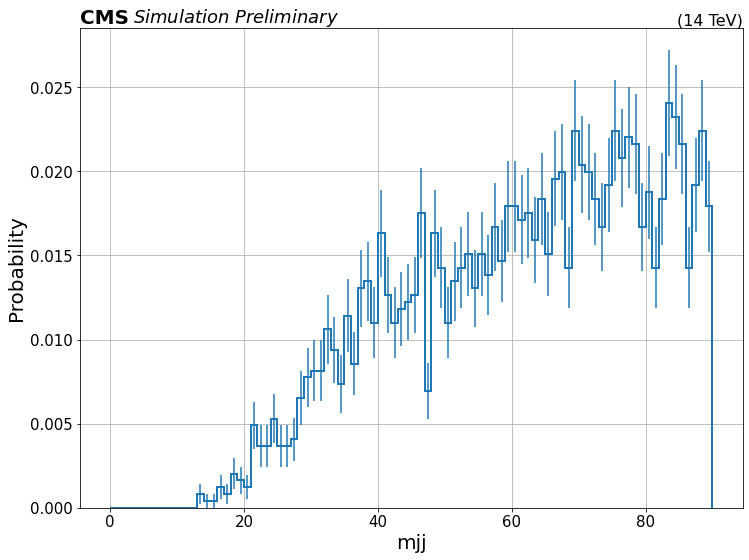

DONE


In [60]:
variables = [
    "mjj"
#     "mgg"
#     "vtx_pt2",
#     "npuVertices"
#     "GEN_Leading_H_mass_over_pt",
#     "GEN_Subleading_H_mass_over_pt"    
#     "GEN_Leading_W_mass_over_pt",
#     "GEN_Subleading_W_mass_over_pt"
#     "GEN_DR_Lepton_Quark0",
#     "GEN_DR_Lepton_Quark1",
#     "GEN_Lepton_0_pdgId"
#     "GEN_Lepton_0_pt",
#     "GEN_Quark_0_pt",
#     "GEN_Quark_1_pt" ,  
#     "GEN_Lepton_0_eta", 
#     "GEN_Quark_0_eta", 
#     "GEN_Quark_1_eta", 
#     "GEN_Lepton_0_phi",
#     "GEN_Quark_0_phi", 
#     "GEN_Quark_1_phi",    
#     "N_allElectrons",
#     "N_allMuons",
#     "N_allLeptons",
#     "N_goodLeptons",
#     "N_allJets",
#     "N_goodJets",
#     "N_goodElectrons",
#     "N_goodMuons"
]

isWide = 0 

specialVariables = {
    "N_allLeptons" : ['add', 'N_allElectrons', "N_allMuons"],
    "N_goodLeptons" : ['add', 'N_goodElectrons', "N_goodMuons"],
    "GEN_DR_Lepton_Quark0" : ['dR', 'GEN_Lepton_0', 'GEN_Quark_0'],
    "GEN_DR_Lepton_Quark1" : ['dR', 'GEN_Lepton_0', 'GEN_Quark_1'],
    "GEN_Leading_W_mass_over_pt" : ['divide', 'Leading_GEN_W_M', "Leading_GEN_W_pt"],
    "GEN_Subleading_W_mass_over_pt" : ['divide', 'Subleading_GEN_W_M', "Subleading_GEN_W_pt"],
    "GEN_Leading_H_mass_over_pt" : ['divide', 'Leading_GEN_Higgs_M', "Leading_GEN_Higgs_pt"],
    "GEN_Subleading_H_mass_over_pt" : ['divide', 'Subleading_GEN_Higgs_M', "Subleading_GEN_Higgs_pt"],    
    "mgg" : ['invMass', "gamma", "gamma"],
    "mjj" : ['invMass', "jetpuppi", "jetpuppi"],
}

# tags = [i for i in range(0,4)]
# colors = ['C0', 'C1', 'C2']
# lineStyles = ["solid", "dashed", "dotted"]

for v in variables:
    fig, ax = plt.subplots()
#     fig.set_dpi(200)
    fig.set_size_inches(10, 7.5)
    print("Variable:",v)
    xmin, xmax, nbins = BinDict[v]
    bins = np.linspace(xmin, xmax, nbins + 1)  
    
    ##-- Plot each file on the same artist 
#     for f_i, f in enumerate(SL_files):
#     for f_i, f in enumerate(files):
    print("file:",file_path)
#     color = colors[f_i]
#     lineStyle = lineStyles[f_i]
    u_f = uproot.open(file_path)
    tree = u_f[tree_path]
#     fEnd = f.split('/')[-1]
#     fileLabel = fEnd.split('_')[1]
#     tree_name = tree_names[fEnd]    
    vals = []
    weights = []        

#         for tag_i in tags:
#             print("Tag:",tag_i)
#     fullTreeName = "%s_HHWWggTag_%s"%(tree_name, tag_i)
#     MC_weights = u_f['tagsDumper/trees'][fullTreeName]["weight"].array()

    ##-- Special vars which need adding, multiply, etc. of existing branches 
    if(v in specialVariables.keys()):
        operation, v1_name, v2_name = specialVariables[v]

        if(operation == 'dR'):
            exec("eta_0 =    u_f[tree_path]['%s_eta'].array()"%(v1_name))
            exec("eta_1 =    u_f[tree_path]['%s_eta'].array()"%(v2_name))
            exec("phi_0 =    u_f[tree_path]['%s_phi'].array()"%(v1_name))
            exec("phi_1 =    u_f[tree_path]['%s_phi'].array()"%(v2_name))

            variable_values = DeltaR(eta_0, eta_1, phi_0, phi_1)
            
        elif(operation == 'invMass'):
            ##-- Need four vector values for each 
            exec("MASK = tree['%s_size'].array() > 2"%(v1_name))
            exec("pt_0 = tree['%s_pt'].array()[MASK][:,0]"%(v1_name)) ##-- Leading object
            exec("eta_0 = tree['%s_eta'].array()[MASK][:,0]"%(v1_name)) ##-- Leading object
            exec("phi_0 = tree['%s_phi'].array()[MASK][:,0]"%(v1_name)) ##-- Leading object
            exec("mass_0 = tree['%s_mass'].array()[MASK][:,0]"%(v1_name)) ##-- Leading object
            
            exec("pt_1 = tree['%s_pt'].array()[MASK][:,1]"%(v2_name)) ##-- Subleading object 
            exec("eta_1 = tree['%s_eta'].array()[MASK][:,1]"%(v2_name))
            exec("phi_1 = tree['%s_phi'].array()[MASK][:,1]"%(v2_name)) 
            exec("mass_1 = tree['%s_mass'].array()[MASK][:,1]"%(v2_name))            
            
#             variable_values = np.array(map(InvMass, pt_0, eta_0, phi_0, mass_0, pt_1, eta_1, phi_1, mass_1))
            map_vals = map(InvMass, pt_0, eta_0, phi_0, mass_0, pt_1, eta_1, phi_1, mass_1)
            variable_values = list(map_vals)

        else:
            v1_values = u_f[tree_path][v1_name].array()
            v2_values = u_f[tree_path][v2_name].array()
            exec("variable_values = np.%s(v1_values, v2_values)"%(operation))
    else:
        if(v == "vtx_pt2"):
            variable_values = u_f[tree_path][v].array()[:,0] ##-- 0th vertex 
        else:
            variable_values = u_f[tree_path][v].array()

#     print("Variable_values:",variable_values)
        
    ##-- Update variable values with tag 
    vals = np.append(vals, np.array(variable_values))
#     weights = np.append(weights, np.array(MC_weights))

    ##-- Make histogram 
#     binVals, edges = np.histogram(vals, bins = bins, weights = weights) ##-- Make numpy histogram to get histogram height values in order to avoid drawing on pyplot artist 
#     binVals_noweights, edges_noweights = np.histogram(vals, bins = bins) ##-- Make numpy histogram to get histogram height values in order to avoid drawing on pyplot artist 
    binVals, edges = np.histogram(vals, bins = bins) ##-- Make numpy histogram to get histogram height values in order to avoid drawing on pyplot artist 
    binWidth = (xmax - xmin) / nbins
    binCenters = [float(a) + (float(binWidth)/2.) for a in edges[:-1]]      

    ##-- Stat uncertainty - poissonian per bin then scale with normalization
#     rel_yerrors = [0 if N == 0 else (np.sqrt(N) / N) for N in binVals_noweights] #-- delta(y)
    rel_yerrors = [0 if N == 0 else (np.sqrt(N) / N) for N in binVals] #-- delta(y)

    ##-- Normalize to unity so that each bin is a probability 
    hist_sum = np.sum(binVals)
    binVals = binVals / hist_sum

    normed_yerrors = np.multiply(binVals, rel_yerrors)

    plt.hist(bins[:-1], 
             weights = binVals, 
             bins = bins, 
             histtype = 'step', 
#              label = fileLabel, 
#              linestyle=(lineStyle), 
             linewidth=2,
             color = 'C0'
            )
    plt.errorbar(x = binCenters, 
                 y = binVals, 
                 yerr = normed_yerrors, 
                 color = 'C0', 
                 fmt = " ", # Removes the line 
#                      zorder = 2
                ) 
    Add_CMS_Header(plt, isWide, ax)
    fig.tight_layout()
#     plt.legend(fontsize = 20, loc = 'best')
    plt.xlabel(v, fontsize = 20)
    plt.ylabel("Probability", fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15) 
    plt.grid()
    if("DR" in v):
        ax.axvline(0.4, linestyle = 'solid', color = 'black') ##-- line at 0.4 because of 0.4 selection on dR for jets, leptons and photons. axvlines is by default from min to max 
        plt.text(
            0.12, 0.8, r"$\Delta$R $=$ 0.4",
            fontsize=25,
            horizontalalignment='left',
            verticalalignment='bottom',
            transform=ax.transAxes
        )   
    plt.show()
    plt.close()
    
print("DONE")